In [1]:
#import sys
import psycopg2
import pandas as pd
import numpy as np
#import json
import matplotlib.pyplot as plt      # for plots
import seaborn as sns                # for statistical data visualization
from sklearn.decomposition import PCA  # to apply PCA

# allow to display all columns of dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',None)

In [2]:
# Reading 2018 data
psconn1 = psycopg2.connect(host="pixel.ourcloud.ou.edu", port = 5432, database="IBM_MarketScan", user="faa_student", password="deM%9tAch^")
psquery1=pd.read_sql_query('''select * from data_df ;''',psconn1)
df=pd.DataFrame(psquery1)
#print(data_converted_17)
psconn1.close()
df.head()

C:\Users\mothu\AppData\Local\Temp\ipykernel_48172\3142695093.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  psquery1=pd.read_sql_query('''select * from data_df ;''',psconn1)


,enrolid,age,sex,agegrp,shortstay,mediumstay,longstay,imp_mdc,non_mdc,emer_visits,non_emer_visits,thergrp_count,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,target_VII,target_IX,target_X,target_XIX
0,2291314402,60,1,5,2,1,0,3,0,5,69,0,0,0,5,4,0,1,0,0,10,2,1,0,1,5,0,0,0,8,0,0,3,0,0,1,0,0
1,2690798001,57,1,5,0,1,0,0,1,0,20,2,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,0,0,1,0,0,0,1,1
2,2485178506,45,2,4,1,0,1,2,0,0,23,1,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1455831702,57,1,5,1,0,0,1,0,0,54,3,0,0,1,3,1,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,25068070301,48,1,4,0,0,2,2,0,3,90,10,0,0,3,6,0,0,0,0,11,4,0,0,0,2,0,0,0,4,0,0,0,0,0,1,0,0


In [3]:
df = df[df['IX']==0]
df.drop('IX',axis = 1,inplace = True)
df.drop(['target_VII','target_X','target_XIX'],axis = 1,inplace = True)

In [4]:
df

,enrolid,age,sex,agegrp,shortstay,mediumstay,longstay,imp_mdc,non_mdc,emer_visits,non_emer_visits,thergrp_count,I,II,III,IV,V,VI,VII,VIII,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,target_IX
1,2690798001,57,1,5,0,1,0,0,1,0,20,2,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,0,0,1,0,0
2,2485178506,45,2,4,1,0,1,2,0,0,23,1,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
6,2308096905,23,2,2,1,0,0,0,1,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0
9,25384664001,39,1,3,1,0,0,1,0,1,18,1,0,0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,2,0,0,2,0,0
10,2631532101,32,2,2,0,1,0,0,1,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146719,4277318102,26,2,2,1,0,0,0,1,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0
146720,33324061902,28,2,2,1,0,0,0,1,0,29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,0,0,0,3,0,0
146724,3725120003,21,1,2,0,0,1,1,0,0,64,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,5,3,0,0,0,0
146726,3599354201,24,2,2,1,0,0,0,1,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0


In [5]:
from sklearn.model_selection import train_test_split   # even though this is usually used for train-test split, I am using it to sample the data for now to have stratified sampling
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [6]:
# Set Input Variables and Target Variable
X = df.drop(columns = ['enrolid', 'target_IX'], axis = 1)
y = df['target_IX']

Text(0.5, 1.0, 'Class Distribution')

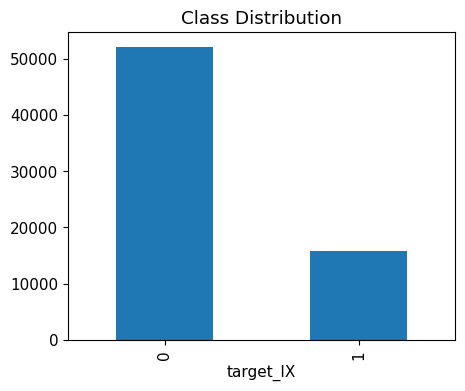

In [7]:
# Set the font size for the plot
plt.rcParams.update({'font.size': 11})

# 2019 and 2020 combined
plt.figure(figsize=(5, 4))
ax = df['target_IX'].value_counts().plot.bar()
ax.set_title('Class Distribution')

In [8]:
# use train_test_split function to split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [9]:
# normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
sm = SMOTE(random_state = 1)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

([<matplotlib.axis.XTick at 0x1d826deb4c0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

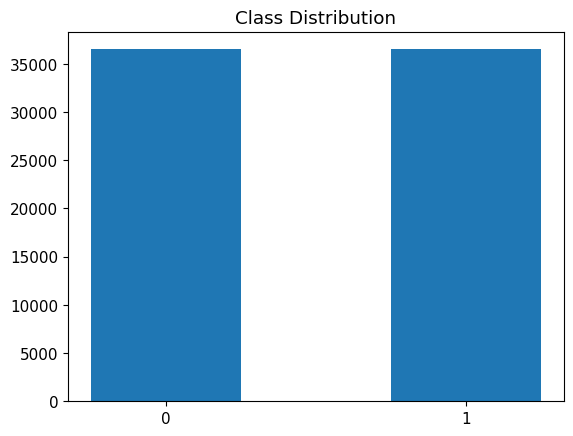

In [11]:
#search unique labels
lebels = list(np.unique(y_train_sm))

#count occurrences of each unique label
lebel_count = list(np.unique(y_train_sm, return_counts=True)[1])

# label frequency
plt.bar(lebels, lebel_count, width = 0.5)
plt.title('Class Distribution')

import math
new_list = range(math.floor(min(lebels)), math.ceil(max(lebels))+1)
plt.xticks(new_list)

In [12]:
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.5f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

# Logistic Regression without hyperparameter tuning

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve

# Assume you have already split your PCA-transformed data into X_train_pca, X_test_pca, and y_train, y_test

# Create a logistic regression model
model = LogisticRegression(random_state=42,solver='liblinear')

# Train the model on the training data
model.fit(X_train_sm, y_train_sm)

LogisticRegression(random_state=42, solver='liblinear')

### Calculating performance metrics with different thresholds

In [15]:
y_probabilities = model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3832,9250,6399,926,13082,7325,0.641055,0.374548,0.805380,0.511308,0.698236,0.347030,0.591092,0.698236,0.335290
1,0.45,3644,10050,5599,1114,13694,6713,0.671044,0.394244,0.765868,0.520534,0.704041,0.356528,0.642214,0.704041,0.346646
2,0.50,3404,10708,4941,1354,14112,6295,0.691527,0.407909,0.715427,0.519576,0.699844,0.358179,0.684261,0.699844,0.343758
3,0.55,3179,11397,4252,1579,14576,5831,0.714265,0.427802,0.668138,0.521618,0.698214,0.363206,0.728289,0.698214,0.348357
4,0.60,2851,12039,3610,1907,14890,5517,0.729652,0.441263,0.599201,0.508245,0.684258,0.357854,0.769314,0.684258,0.334994
5,0.65,2494,12732,2917,2264,15226,5181,0.746117,0.460913,0.524170,0.490510,0.668884,0.352539,0.813598,0.668884,0.323555
6,0.70,1981,13541,2108,2777,15522,4885,0.760621,0.484471,0.416351,0.447835,0.640823,0.337791,0.865295,0.640823,0.297521


### Calculating performance metrics without different thresholds

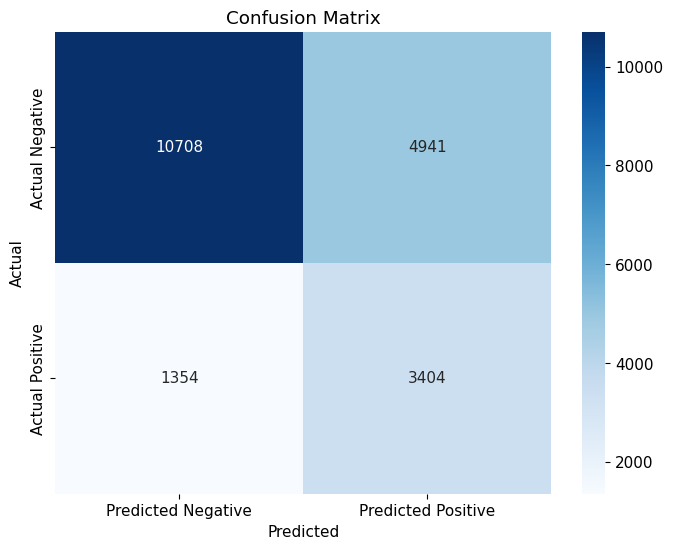

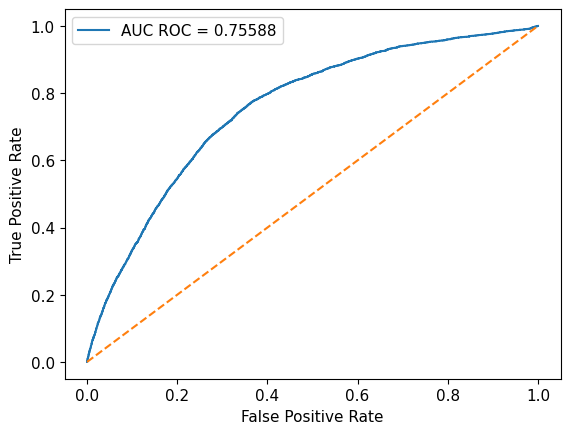

Accuracy: 0.6915274170627725
Precision: 0.4079089275014979
Recall: 0.7154266498528794
F1 Score: 0.5195756696939633
AUC-ROC: 0.7558764651324905
pr_auc 0.4614750170086998


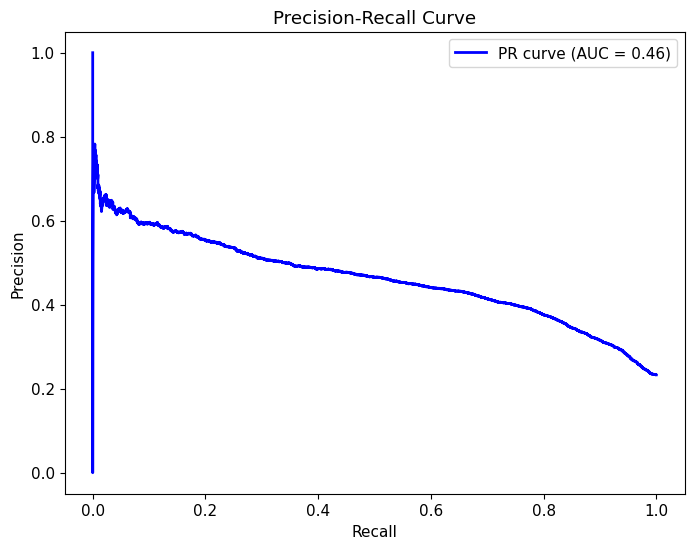

Max F1 Score: 0.5220800355055847
Threshold for Max F1 Score: 0.4770525763184583
ROC-AUC for Max F1 Threshold: 0.7036818651259527


In [35]:
evaluate_classification_model(model, X_test, y_test)

In [19]:
# Predict on the training set 
y_train_pred = model.predict (X_train_sm)
# Predict on the testing set
y_test_pred = model.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.691527


## logistic regression using hyperparameter tuning

In [20]:
from sklearn.model_selection import GridSearchCV
# Instantiate a logistic regression model
logreg = LogisticRegression()

# Define the hyperparameters to search over
hyperparameters = {'penalty': ['l1', 'l2'],
                   'C': [0.01, 0.1, 1, 10, 100],
                   'solver': ['liblinear', 'saga']}

# Use GridSearchCV to find the best hyperparameters
gridsearch = GridSearchCV(logreg, hyperparameters, scoring='roc_auc', cv=5)
gridsearch.fit(X_train_sm, y_train_sm)
best_params = gridsearch.best_params_
print(f"Best hyperparameters: {best_params}")
#Best hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

d:\faacode\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\faacode\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\faacode\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\faacode\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\faacode\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\faacode\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  w

Best hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [21]:
# Train the model with the best hyperparameters on the full training set
logreg = LogisticRegression(**best_params)
logreg.fit(X_train_sm, y_train_sm)

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [22]:
y_probabilities = logreg.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3899,8800,6849,859,12699,7708,0.622286,0.362765,0.819462,0.502902,0.690899,0.339366,0.562336,0.690899,0.323340
1,0.45,3730,9596,6053,1028,13326,7081,0.653011,0.381274,0.783943,0.513032,0.698572,0.349272,0.613202,0.698572,0.336143
2,0.50,3519,10307,5342,1239,13826,6581,0.677513,0.397134,0.739596,0.516778,0.699116,0.354433,0.658636,0.699116,0.339731
3,0.55,3299,10971,4678,1459,14270,6137,0.699270,0.413564,0.693359,0.518100,0.697213,0.358243,0.701067,0.697213,0.341795
4,0.60,3036,11622,4027,1722,14658,5749,0.718283,0.429846,0.638083,0.513662,0.690375,0.358660,0.742667,0.690375,0.338422
5,0.65,2705,12281,3368,2053,14986,5421,0.734356,0.445414,0.568516,0.499492,0.676647,0.353828,0.784779,0.676647,0.326744
6,0.70,2255,13026,2623,2503,15281,5126,0.748812,0.462280,0.473939,0.468037,0.653162,0.341746,0.832385,0.653162,0.303699


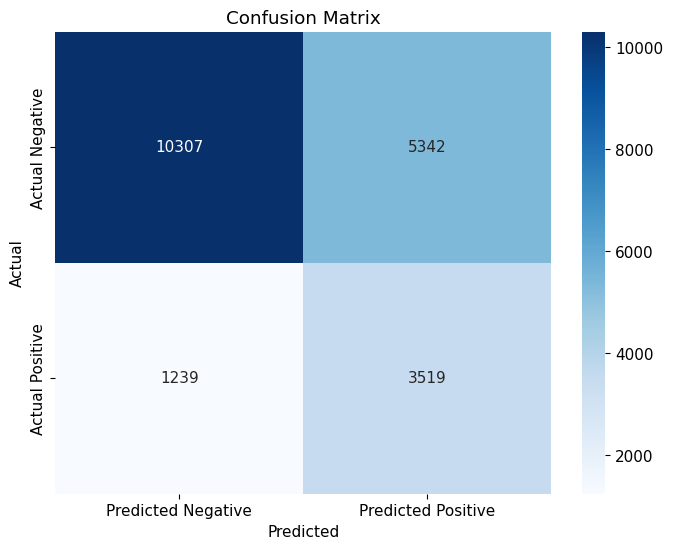

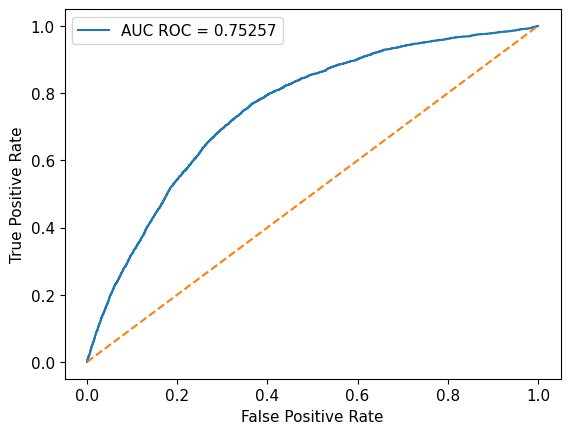

Accuracy: 0.6775126182192385
Precision: 0.3971335063762555
Recall: 0.7395964691046658
F1 Score: 0.516778030692415
AUC-ROC: 0.7525657907654767
pr_auc 0.4496290401247714


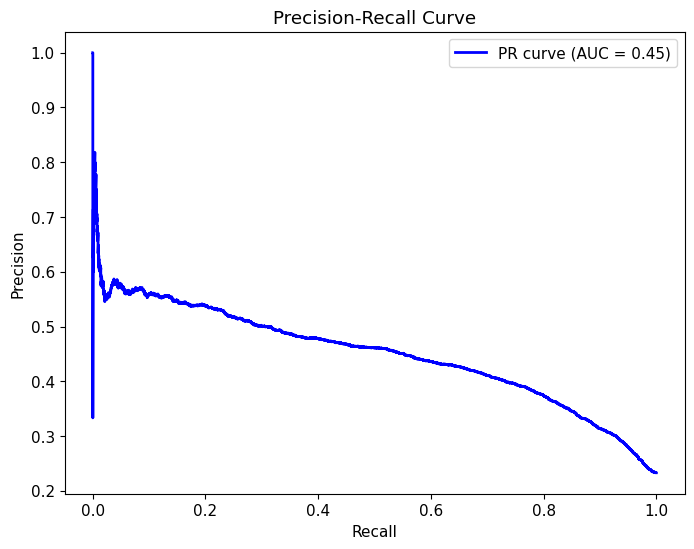

Max F1 Score: 0.518598884066956
Threshold for Max F1 Score: 0.5414573432249594
ROC-AUC for Max F1 Threshold: 0.6982538947960716


In [36]:
evaluate_classification_model(logreg, X_test, y_test)

In [25]:
# Predict on the training set 
y_train_pred = logreg.predict (X_train_sm)
# Predict on the testing set
y_test_pred = logreg.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.677513


# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve
# Create a Random Forest model
rf_model = RandomForestClassifier()

# Fit the model to your data
rf_model.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [27]:
y_probabilities = rf_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4326,3792,11857,432,8118,12289,0.397805,0.267318,0.909206,0.413161,0.575761,0.264216,0.242316,0.575761,0.158139
1,0.45,4121,4883,10766,637,9004,11403,0.441221,0.276819,0.866120,0.419547,0.589076,0.270973,0.312033,0.589076,0.169580
2,0.50,3825,6023,9626,933,9848,10559,0.482580,0.284365,0.803909,0.420122,0.594395,0.274324,0.384881,0.594395,0.168414
3,0.55,3456,7335,8314,1302,10791,9616,0.528789,0.293628,0.726356,0.418199,0.597538,0.277080,0.468720,0.597538,0.166951
4,0.60,2992,8704,6945,1766,11696,8711,0.573137,0.301097,0.628836,0.407213,0.592519,0.275879,0.556202,0.592519,0.156536
5,0.65,2530,10173,5476,2228,12703,7704,0.622482,0.316013,0.531736,0.396427,0.590905,0.277214,0.650073,0.590905,0.157448
6,0.70,2052,11453,4196,2706,13505,6902,0.661783,0.328425,0.431274,0.372888,0.581571,0.274243,0.731868,0.581571,0.149669


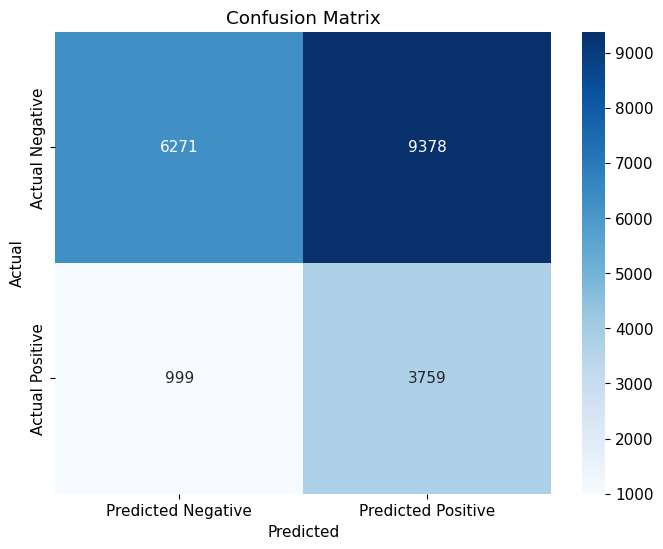

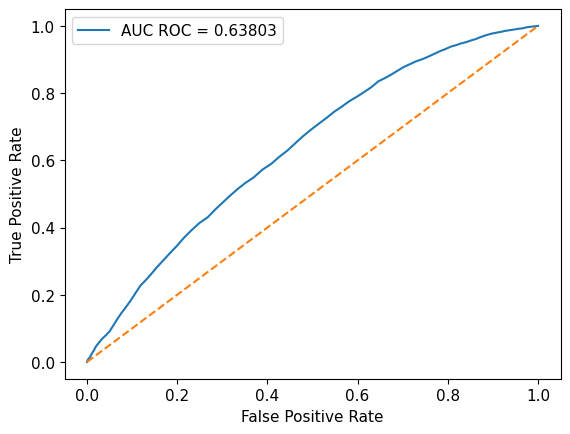

Accuracy: 0.49149801538687704
Precision: 0.2861383877597625
Recall: 0.7900378310214375
F1 Score: 0.4201173512154234
AUC-ROC: 0.6380263840759928
pr_auc 0.32430946808692407


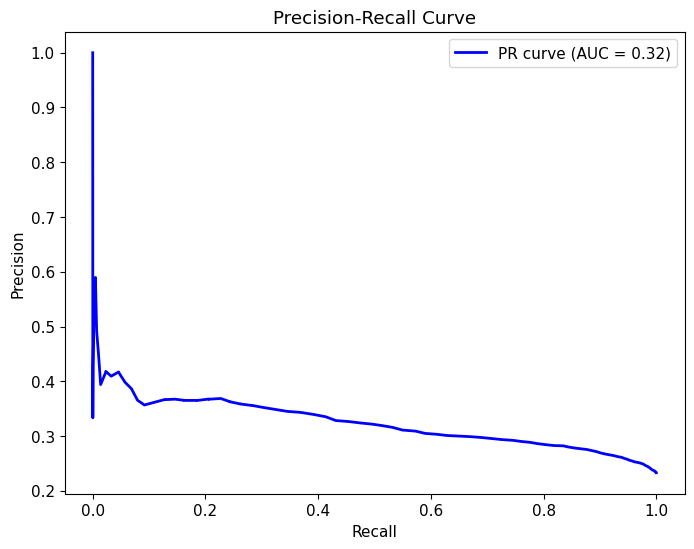

Max F1 Score: 0.42186836518046705
Threshold for Max F1 Score: 0.48
ROC-AUC for Max F1 Threshold: 0.5946525086605268


In [37]:
evaluate_classification_model(rf_model, X_test, y_test)

In [29]:
# Predict on the training set 
y_train_pred = rf_model.predict (X_train_sm)
# Predict on the testing set
y_test_pred = rf_model.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  1.00
Testing Accuracy:  0.491498


In [ ]:
# Random Forest with hyperparameter tuning

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200],
    'max_features':['sqrt', 'log2', None],
    'criterion':['gini', 'entropy', 'log_loss']  
}
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="roc_auc")


grid_search.fit(X_train_sm, y_train_sm)
# took around 8363 seconds
#Best hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 200}
#Best score: 0.9235951642997708

In [31]:
best_rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, criterion='entropy',max_depth=20,max_features='sqrt',min_samples_leaf=5,n_estimators=200)
best_rf_model.fit(X_train_sm,y_train_sm)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [32]:
y_probabilities = best_rf_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4298,4652,10997,460,8950,11457,0.438575,0.281007,0.903321,0.428664,0.600296,0.276381,0.297271,0.600296,0.195749
1,0.45,4093,5908,9741,665,10001,10406,0.490077,0.295865,0.860235,0.440297,0.618884,0.287101,0.377532,0.618884,0.215155
2,0.50,3838,7039,8610,920,10877,9530,0.533003,0.308323,0.806641,0.446123,0.628223,0.293788,0.449805,0.628223,0.222317
3,0.55,3536,8536,7113,1222,12072,8335,0.591562,0.332050,0.743169,0.459012,0.644318,0.306651,0.545466,0.644318,0.244326
4,0.60,3186,9967,5682,1572,13153,7254,0.644534,0.359269,0.669609,0.467635,0.653259,0.317602,0.636910,0.653259,0.261466
5,0.65,2777,10913,4736,1981,13690,6717,0.670848,0.369626,0.583649,0.452612,0.640505,0.312806,0.697361,0.640505,0.246363
6,0.70,2291,11924,3725,2467,14215,6192,0.696575,0.380818,0.481505,0.425283,0.621735,0.304256,0.761966,0.621735,0.225789


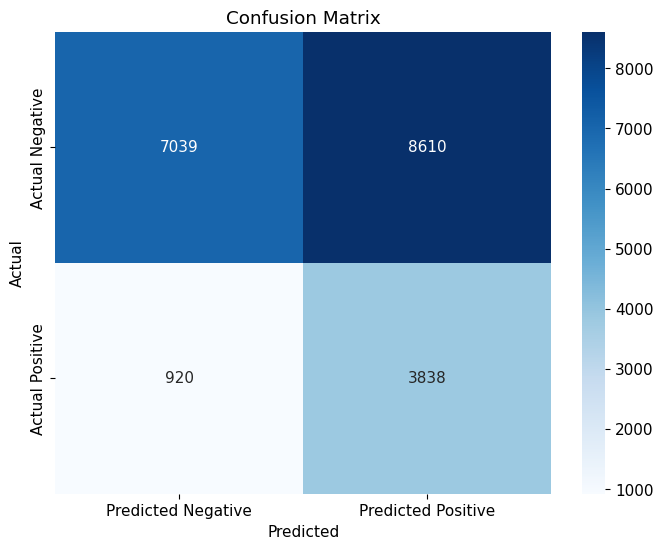

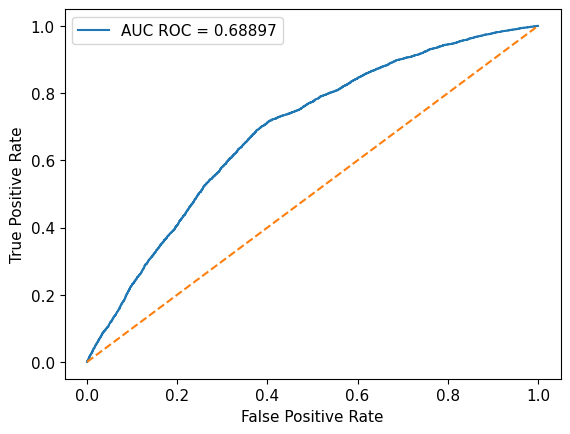

Accuracy: 0.5330033811927279
Precision: 0.3083226221079691
Recall: 0.8066414459857083
F1 Score: 0.4461234453097756
AUC-ROC: 0.6889732998529559
pr_auc 0.3660669992301635


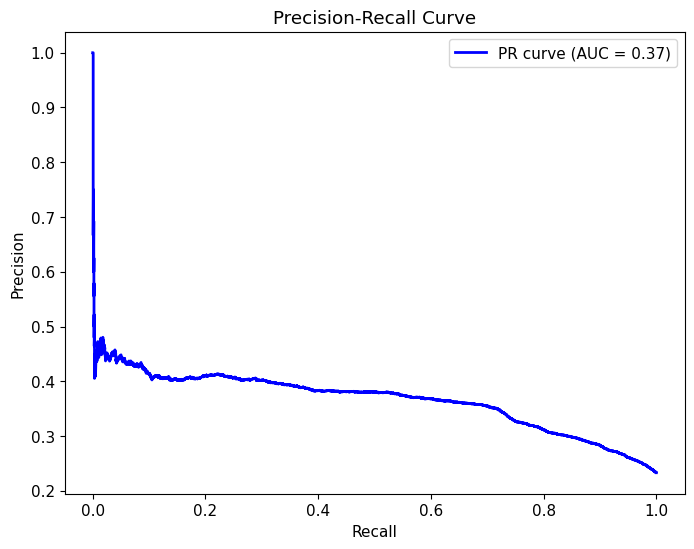

Max F1 Score: 0.471535527616895
Threshold for Max F1 Score: 0.5800675745227778
ROC-AUC for Max F1 Threshold: 0.6570911401231047


In [38]:
evaluate_classification_model(best_rf_model, X_test, y_test)

In [39]:
# Predict on the training set 
y_train_pred = best_rf_model.predict (X_train_sm)
# Predict on the testing set
y_test_pred = best_rf_model.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.92
Testing Accuracy:  0.533003


# naive bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train_sm, y_train_sm)

GaussianNB()

In [42]:
y_probabilities = gnb.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3657,9175,6474,1101,12832,7575,0.628804,0.360971,0.768600,0.491235,0.677450,0.331395,0.586299,0.677450,0.300139
1,0.45,3618,9308,6341,1140,12926,7481,0.633410,0.363289,0.760404,0.491676,0.677601,0.332110,0.594798,0.677601,0.300474
2,0.50,3578,9449,6200,1180,13027,7380,0.638359,0.365924,0.751997,0.492295,0.677903,0.332997,0.603809,0.677903,0.301160
3,0.55,3531,9578,6071,1227,13109,7298,0.642378,0.367736,0.742119,0.491783,0.677085,0.333030,0.612052,0.677085,0.300037
4,0.60,3501,9691,5958,1257,13192,7215,0.646445,0.370124,0.735813,0.492509,0.677543,0.333938,0.619273,0.677543,0.301092
5,0.65,3456,9833,5816,1302,13289,7118,0.651198,0.372735,0.726356,0.492659,0.677351,0.334540,0.628347,0.677351,0.301223
6,0.70,3396,9994,5655,1362,13390,7017,0.656147,0.375207,0.713745,0.491853,0.676190,0.334544,0.638635,0.676190,0.299921


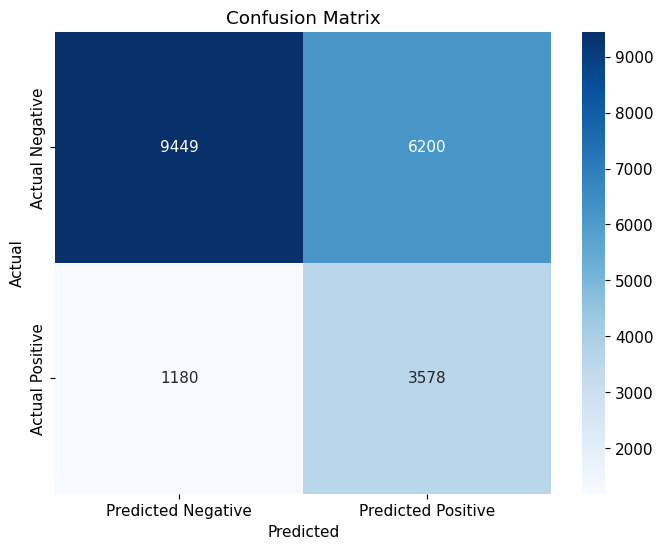

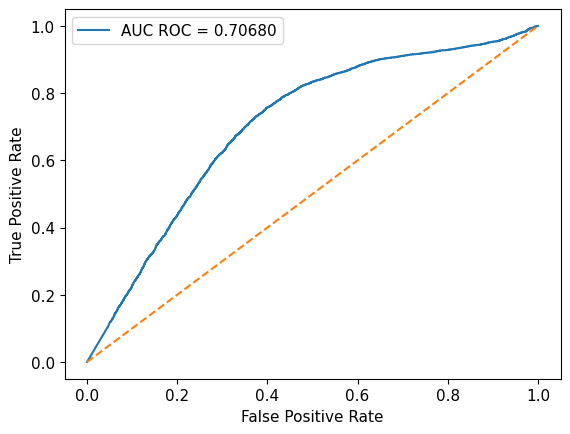

Accuracy: 0.6383593864850297
Precision: 0.36592350173859683
Recall: 0.7519966372425388
F1 Score: 0.492294991744634
AUC-ROC: 0.7067986112213522
pr_auc 0.4055975496893155


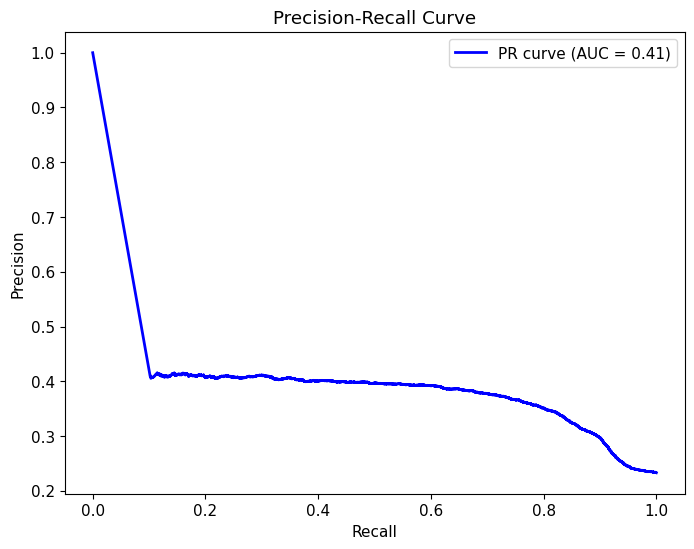

Max F1 Score: 0.49341924869755954
Threshold for Max F1 Score: 0.48348188396826847
ROC-AUC for Max F1 Threshold: 0.6791189246138443


In [43]:
evaluate_classification_model(gnb, X_test, y_test)

In [44]:
# Predict on the training set 
y_train_pred = gnb.predict (X_train_sm)
# Predict on the testing set
y_test_pred = gnb.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.69
Testing Accuracy:  0.638359


# XGBOOST

In [45]:
import xgboost as xgb

In [46]:
# Create an XGBoost classifier with default hyperparameters
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the XGBoost model on the training data
xgb_classifier.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [47]:
y_probabilities = xgb_classifier.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4704,669,14980,54,5373,15034,0.263292,0.238976,0.988651,0.384911,0.515701,0.238910,0.042750,0.515701,0.071825
1,0.45,4685,824,14825,73,5509,14898,0.269956,0.240133,0.984657,0.386105,0.518656,0.240026,0.052655,0.518656,0.076964
2,0.50,4674,967,14682,84,5641,14766,0.276425,0.241476,0.982346,0.387659,0.522069,0.241329,0.061793,0.522069,0.084443
3,0.55,4657,1134,14515,101,5791,14616,0.283775,0.242906,0.978773,0.389219,0.525619,0.242699,0.072465,0.525619,0.090860
4,0.60,4637,1309,14340,121,5946,14461,0.291371,0.244348,0.974569,0.390731,0.529108,0.244064,0.083648,0.529108,0.096432
5,0.65,4599,1524,14125,159,6123,14284,0.300044,0.245621,0.966583,0.391704,0.531985,0.245204,0.097386,0.531985,0.098329
6,0.70,4561,1776,13873,197,6337,14070,0.310531,0.247423,0.958596,0.393325,0.536043,0.246832,0.113490,0.536043,0.103141


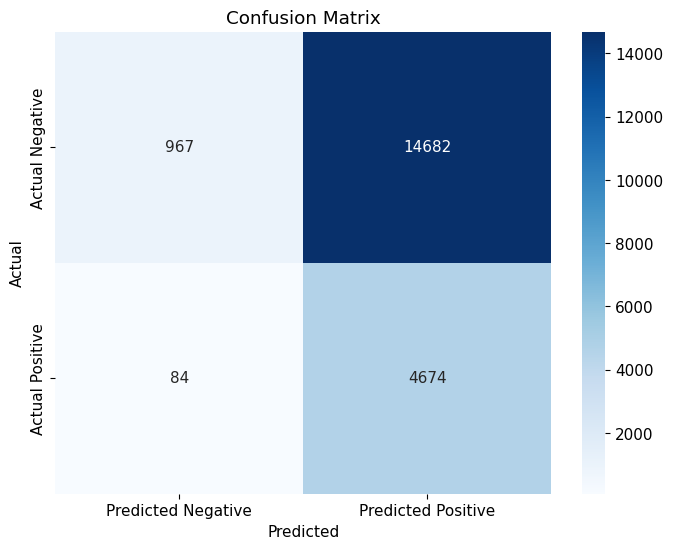

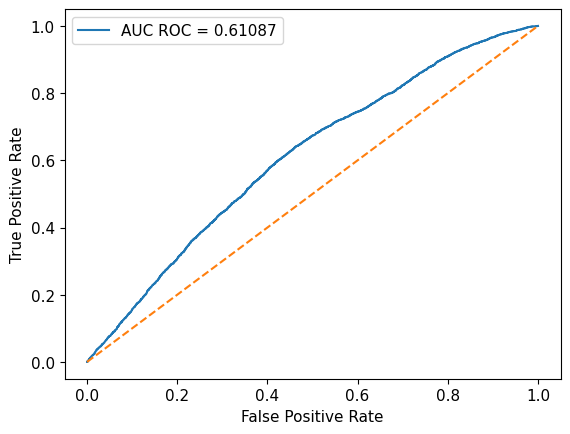

Accuracy: 0.276424756211104
Precision: 0.24147551146931184
Recall: 0.9823455233291298
F1 Score: 0.38765862154764863
AUC-ROC: 0.6108732497602472
pr_auc 0.2973821179533353


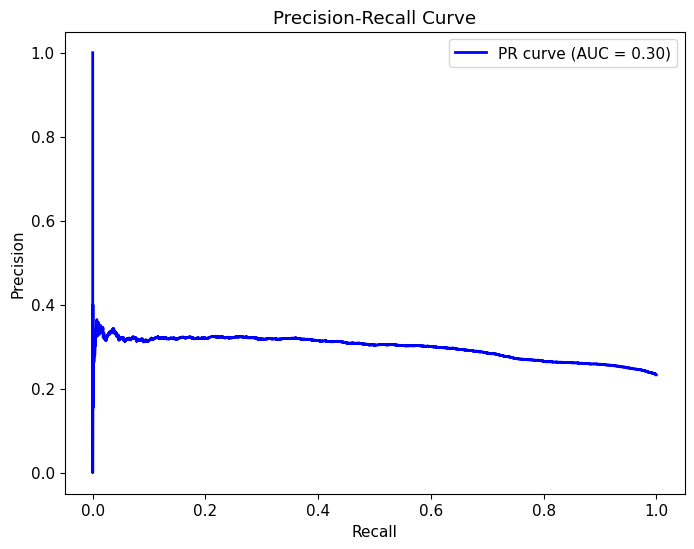

Max F1 Score: 0.4064928553522186
Threshold for Max F1 Score: 0.9835755
ROC-AUC for Max F1 Threshold: 0.5866248559488793


In [48]:
evaluate_classification_model(xgb_classifier, X_test, y_test)

In [50]:
# Predict on the training set 
y_train_pred = xgb_classifier.predict (X_train_sm)
# Predict on the testing set
y_test_pred = xgb_classifier.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.88
Testing Accuracy:  0.276425


# XGBoost hyperparameter tuning

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of boosting rounds
    'max_depth': [3, 4, 5],           # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
}

# Use GridSearchCV to find the best hyperparameters
gridsearch = GridSearchCV(xgb_classifier, param_grid, scoring='roc_auc', cv=5, verbose=2)
gridsearch.fit(X_train_sm, y_train_sm)

best_params = gridsearch.best_params_
print(f"Best hyperparameters: {best_params}")
#Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [53]:
# Train the XGBoost model with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", **best_params, random_state=42)
best_xgb_classifier.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [54]:
y_probabilities = best_xgb_classifier.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4694,863,14786,64,5557,14850,0.272309,0.240965,0.986549,0.387326,0.520848,0.240860,0.055147,0.520848,0.084668
1,0.45,4674,1049,14600,84,5723,14684,0.280443,0.242503,0.982346,0.388981,0.524689,0.242338,0.067033,0.524689,0.091179
2,0.50,4655,1224,14425,103,5879,14528,0.288087,0.243973,0.978352,0.390553,0.528284,0.243739,0.078216,0.528284,0.097007
3,0.55,4635,1383,14266,123,6018,14389,0.294899,0.245225,0.974149,0.391817,0.531263,0.244913,0.088376,0.531263,0.101124
4,0.60,4603,1558,14091,155,6161,14246,0.301906,0.246229,0.967423,0.392546,0.533491,0.245803,0.099559,0.533491,0.102138
5,0.65,4563,1893,13756,195,6456,13951,0.316362,0.249086,0.959016,0.395459,0.539991,0.248433,0.120966,0.539991,0.111592
6,0.70,4503,2302,13347,255,6805,13602,0.333464,0.252269,0.946406,0.398355,0.546754,0.251245,0.147102,0.546754,0.119432


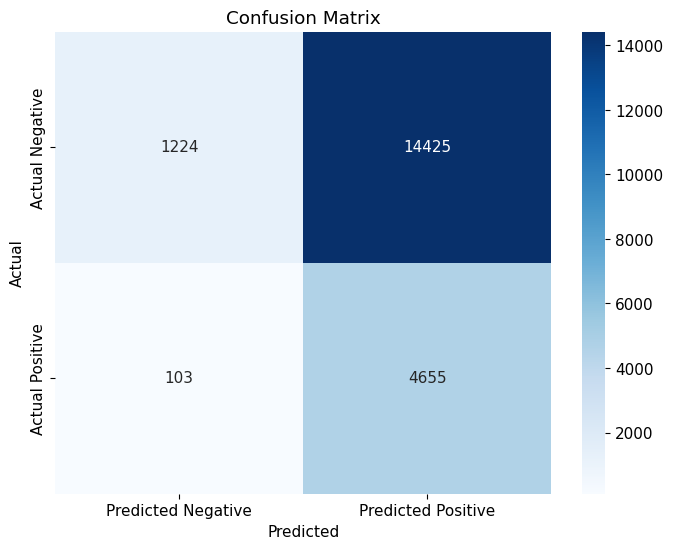

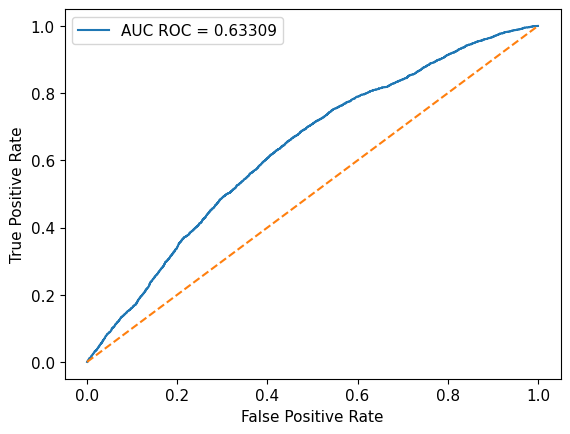

Accuracy: 0.28808742098299606
Precision: 0.2439727463312369
Recall: 0.9783522488440521
F1 Score: 0.3905528987331152
AUC-ROC: 0.6330931024120974
pr_auc 0.31450366792124607


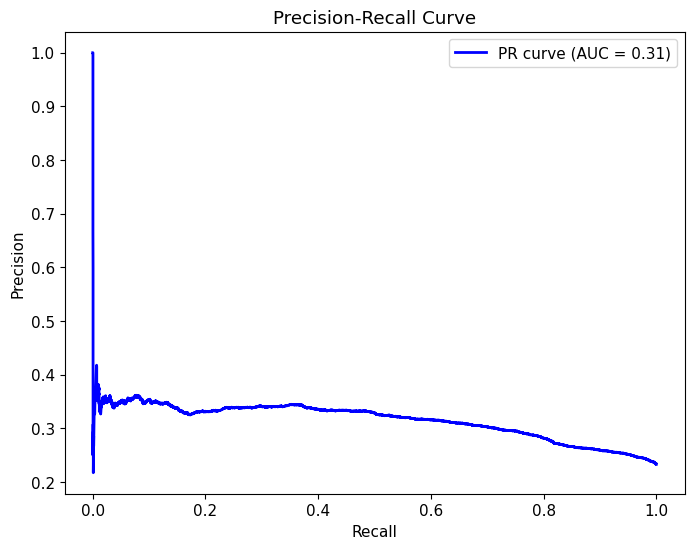

Max F1 Score: 0.4240018955100106
Threshold for Max F1 Score: 0.9528533
ROC-AUC for Max F1 Threshold: 0.6030827644954249


In [55]:
evaluate_classification_model(best_xgb_classifier, X_test, y_test)

In [56]:
# Predict on the training set 
y_train_pred = best_xgb_classifier.predict (X_train_sm)
# Predict on the testing set
y_test_pred = best_xgb_classifier.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.87
Testing Accuracy:  0.288087


# SVM

In [57]:
from sklearn.svm import SVC

In [58]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42,probability=True)

# Train the SVM model on the training data
svm_classifier.fit(X_train_sm, y_train_sm)
#2253 seconds

SVC(kernel='linear', probability=True, random_state=42)

In [59]:
y_probabilities = svm_classifier.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3784,9610,6039,974,13394,7013,0.656343,0.385218,0.795292,0.519032,0.704694,0.354090,0.614097,0.704694,0.346453
1,0.45,3617,10210,5439,1141,13827,6580,0.677562,0.399404,0.760193,0.523672,0.706316,0.359536,0.652438,0.706316,0.351182
2,0.50,3445,10776,4873,1313,14221,6186,0.696869,0.414162,0.724044,0.526920,0.706325,0.364212,0.688606,0.706325,0.355085
3,0.55,3173,11410,4239,1585,14583,5824,0.714608,0.428090,0.666877,0.521446,0.697998,0.363152,0.729120,0.697998,0.348170
4,0.60,2909,11939,3710,1849,14848,5559,0.727593,0.439492,0.611391,0.511383,0.687158,0.359308,0.762924,0.687158,0.338101
5,0.65,2563,12633,3016,2195,15196,5211,0.744646,0.459401,0.538672,0.495889,0.672972,0.355028,0.807272,0.672972,0.328202
6,0.70,2124,13314,2335,2634,15438,4969,0.756505,0.476340,0.446406,0.460887,0.648598,0.341714,0.850789,0.648598,0.304106


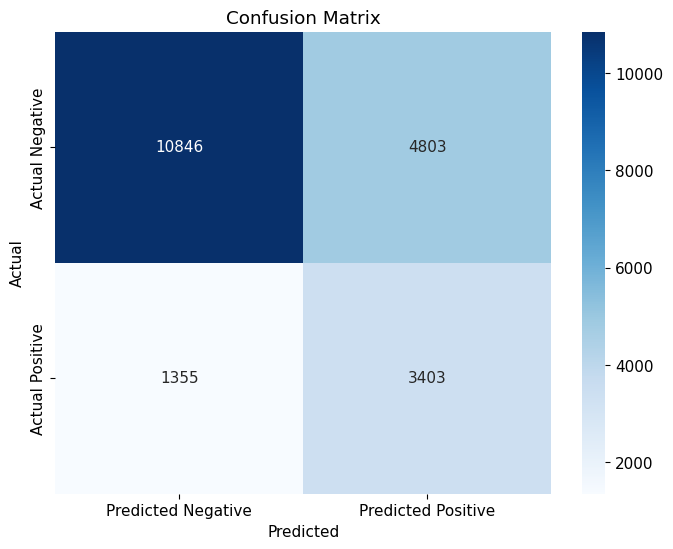

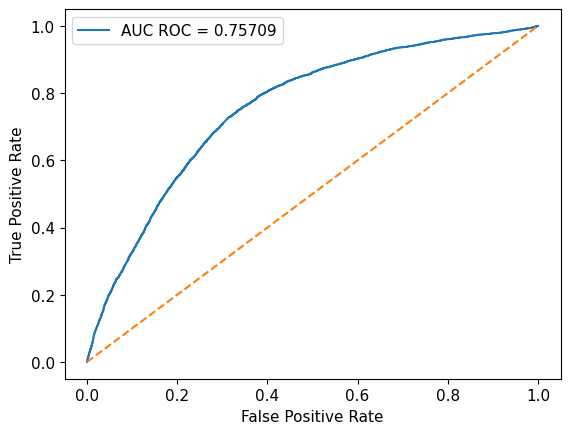

Accuracy: 0.6982407997255844
Precision: 0.4146965634901292
Recall: 0.7152164775115595
F1 Score: 0.5249922863313792
AUC-ROC: 0.7570886796736875
pr_auc 0.46008538585788705


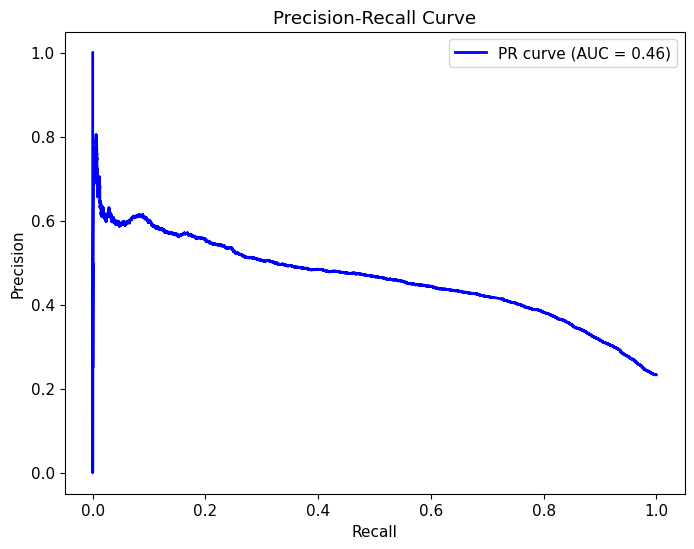

Max F1 Score: 0.527477546049627
Threshold for Max F1 Score: 0.4909421598316517
ROC-AUC for Max F1 Threshold: 0.7070847929157107


In [60]:
evaluate_classification_model(svm_classifier, X_test, y_test)

In [61]:
# Predict on the training set 
y_train_pred = svm_classifier.predict(X_train_sm)
# Predict on the testing set
y_test_pred = svm_classifier.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.698241


# SVM with hyperparameter tuning

In [62]:
from sklearn.model_selection import RandomizedSearchCV
svm_classifier = SVC(random_state=42,probability=True)
# Define the hyperparameters to search over
hyperparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                   'C': [0.1, 1, 10, 100, 1000],
                   'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
                   'degree':[0,1,2,3,4]}
randomsearch = RandomizedSearchCV(svm_classifier, hyperparameters,cv=5,n_iter=2)
randomsearch.fit(X_train_sm, y_train_sm)
best_params = randomsearch.best_params_
print(f"Best hyperparameters: {best_params}")
pd.DataFrame(randomsearch.cv_results_)[['param_kernel','param_C','param_gamma','param_degree','mean_test_score']]
# Best hyperparameters: {'kernel': 'linear', 'gamma': 0.0001, 'degree': 0, 'C': 10}
# 17803 seconds

Best hyperparameters: {'kernel': 'linear', 'gamma': 0.0001, 'degree': 0, 'C': 10}


,param_kernel,param_C,param_gamma,param_degree,mean_test_score
0,linear,10,0.0001,0,0.700797
1,rbf,0.1,0.0001,1,0.537853


In [64]:
svm_classifier_best = SVC(random_state=42,probability=True,kernel='linear',C=10,gamma=0.0001,degree=0)
svm_classifier_best.fit(X_train_sm, y_train_sm)

SVC(C=10, degree=0, gamma=0.0001, kernel='linear', probability=True,
    random_state=42)

In [65]:
y_probabilities = svm_classifier_best.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3827,9396,6253,931,13223,7184,0.647964,0.379663,0.804330,0.515838,0.702376,0.350996,0.600422,0.702376,0.342315
1,0.45,3658,10031,5618,1100,13689,6718,0.670799,0.394351,0.768810,0.521305,0.704905,0.357084,0.640999,0.704905,0.348009
2,0.50,3498,10587,5062,1260,14085,6322,0.690204,0.408645,0.735183,0.525304,0.705856,0.362172,0.676529,0.705856,0.352783
3,0.55,3233,11263,4386,1525,14496,5911,0.710344,0.424334,0.679487,0.522421,0.699607,0.363059,0.719727,0.699607,0.348988
4,0.60,2995,11767,3882,1763,14762,5645,0.723379,0.435510,0.629466,0.514826,0.690700,0.360531,0.751933,0.690700,0.341183
5,0.65,2645,12414,3235,2113,15059,5348,0.737933,0.449830,0.555906,0.497274,0.674592,0.353606,0.793278,0.674592,0.326011
6,0.70,2241,13119,2530,2517,15360,5047,0.752683,0.469713,0.470996,0.470354,0.654662,0.344573,0.838328,0.654662,0.309031


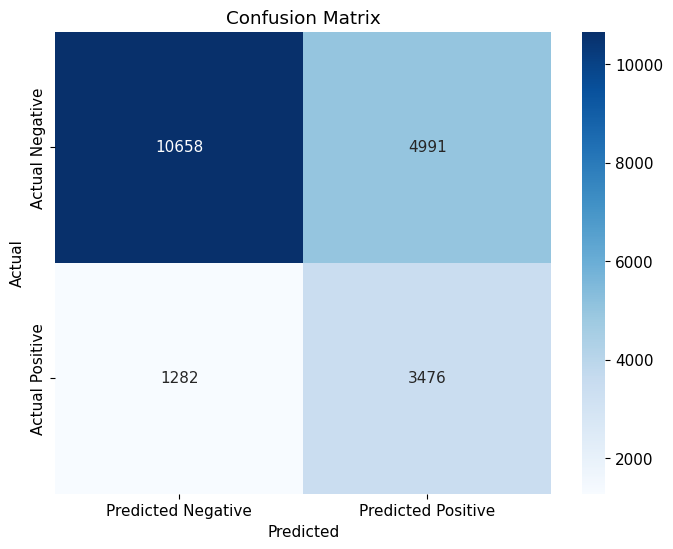

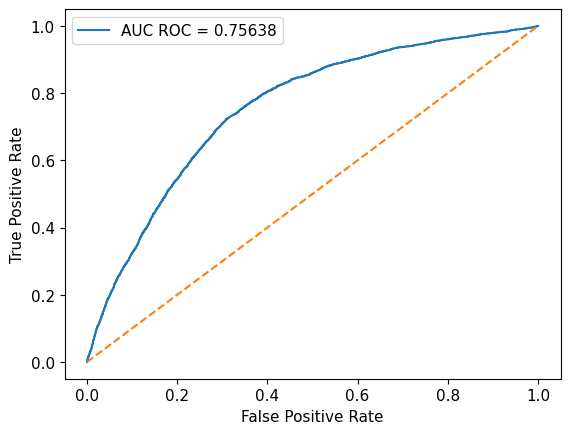

Accuracy: 0.6926054785122752
Precision: 0.4105350183063659
Recall: 0.7305590584279109
F1 Score: 0.5256710775047259
AUC-ROC: 0.7563804409205938
pr_auc 0.455759400902136


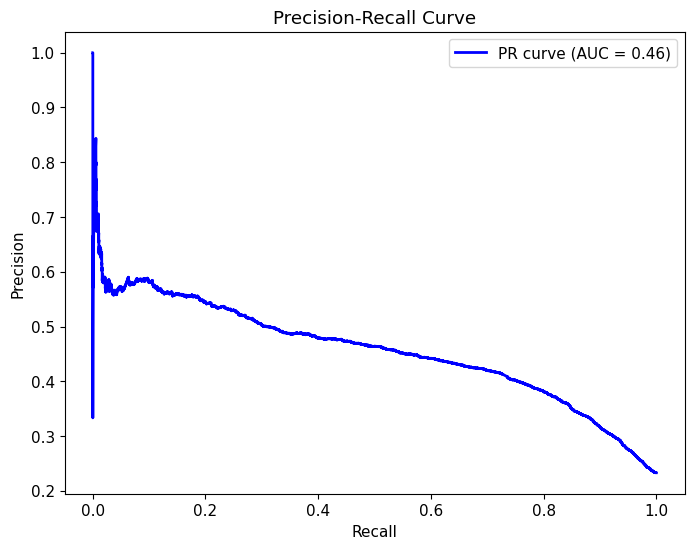

Max F1 Score: 0.5275028768699656
Threshold for Max F1 Score: 0.5106727019431204
ROC-AUC for Max F1 Threshold: 0.7066757364849005


In [66]:
evaluate_classification_model(svm_classifier_best, X_test, y_test)

In [67]:
# Predict on the training set 
y_train_pred = svm_classifier_best.predict(X_train_sm)
# Predict on the testing set
y_test_pred = svm_classifier_best.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.692605


# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_sm,y_train_sm)

KNeighborsClassifier()

In [70]:
y_probabilities = knn_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3583,8016,7633,1175,11599,8808,0.568383,0.319454,0.753047,0.448604,0.632642,0.298143,0.512237,0.632642,0.225459
1,0.45,2871,10410,5239,1887,13281,7126,0.650806,0.354007,0.603405,0.446223,0.634312,0.306078,0.665218,0.634312,0.232107
2,0.50,2871,10410,5239,1887,13281,7126,0.650806,0.354007,0.603405,0.446223,0.634312,0.306078,0.665218,0.634312,0.232107
3,0.55,2871,10410,5239,1887,13281,7126,0.650806,0.354007,0.603405,0.446223,0.634312,0.306078,0.665218,0.634312,0.232107
4,0.60,2871,10410,5239,1887,13281,7126,0.650806,0.354007,0.603405,0.446223,0.634312,0.306078,0.665218,0.634312,0.232107
5,0.65,1961,12638,3011,2797,14599,5808,0.715392,0.394409,0.412148,0.403083,0.609870,0.299616,0.807592,0.609870,0.216444
6,0.70,1961,12638,3011,2797,14599,5808,0.715392,0.394409,0.412148,0.403083,0.609870,0.299616,0.807592,0.609870,0.216444


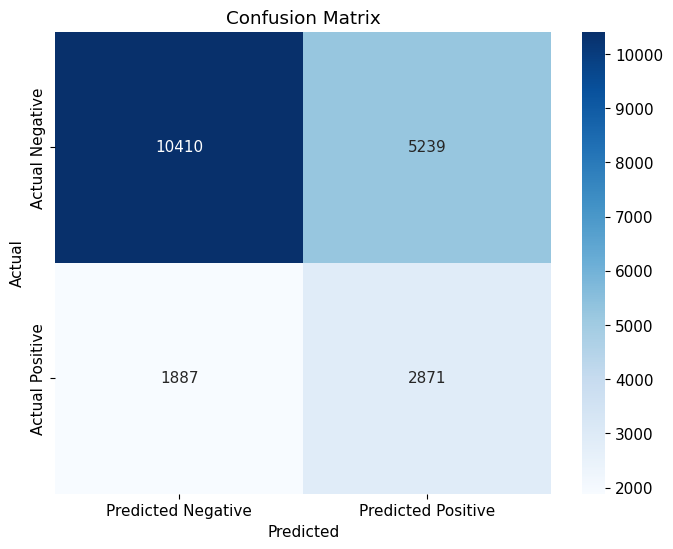

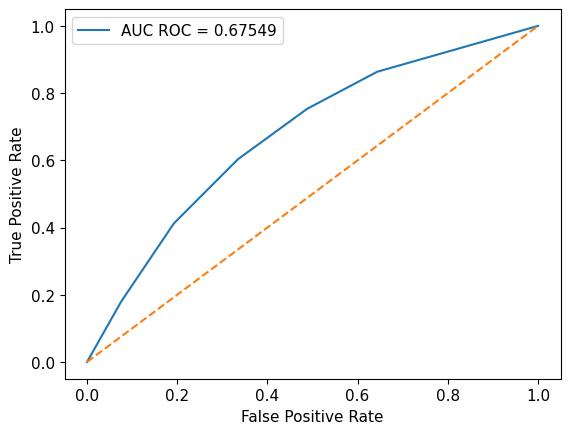

Accuracy: 0.650806095947469
Precision: 0.3540073982737361
Recall: 0.6034047919293821
F1 Score: 0.44622318930680754
AUC-ROC: 0.6754912860739557
pr_auc 0.41336935055339613


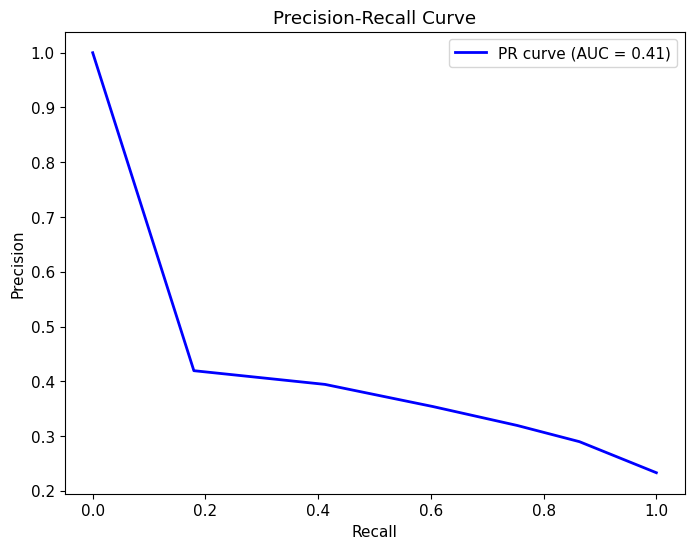

Max F1 Score: 0.4486039814698886
Threshold for Max F1 Score: 0.4
ROC-AUC for Max F1 Threshold: 0.632642351302162


In [71]:
evaluate_classification_model(knn_model, X_test, y_test)

In [72]:
# Predict on the training set 
y_train_pred = knn_model.predict(X_train_sm)
# Predict on the testing set
y_test_pred = knn_model.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.85
Testing Accuracy:  0.650806


## KNN with hyperparameter tuning

In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [16]:
knn_tune_model = KNeighborsClassifier()
# Define the hyperparameters to tune
hyperparameters = {'n_neighbors': range(1, 40),
                   'weights':['uniform', 'distance'],
                   'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'leaf_size':[20,30,40,50,60]}
randomsearch = RandomizedSearchCV(knn_tune_model, hyperparameters,cv=3,n_iter=2)
randomsearch.fit(X_train_sm, y_train_sm)
best_params = randomsearch.best_params_
print(f"Best hyperparameters: {best_params}")
pd.DataFrame(randomsearch.cv_results_)[['param_n_neighbors','param_weights','param_algorithm','param_leaf_size','mean_test_score']]
# Best hyperparameters: {'weights': 'distance', 'n_neighbors': 18, 'leaf_size': 20, 'algorithm': 'auto'}

Best hyperparameters: {'weights': 'distance', 'n_neighbors': 18, 'leaf_size': 20, 'algorithm': 'auto'}


,param_n_neighbors,param_weights,param_algorithm,param_leaf_size,mean_test_score
0,22,uniform,brute,20,0.719777
1,18,distance,auto,20,0.767830


In [ ]:
knn_tune_model = KNeighborsClassifier()
# Define the hyperparameters to tune
hyperparameters = {'n_neighbors': range(1, 40),
                   'weights':['uniform', 'distance'],
                   'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'leaf_size':[20,30,40,50,60]}

# Create a Grid Search object with the KNN model and hyperparameters to tune
grid_search = GridSearchCV(knn_tune_model, hyperparameters, cv=5)

# Fit the Grid Search object to the training data
grid_search.fit(X_train_sm, y_train_sm)

# Print the best hyperparameters found
print(f'Best hyperparameters found: {grid_search.best_params_}')
                    


In [17]:
# Train the model with the best hyperparameters on the full training set
knn_best = KNeighborsClassifier(algorithm= 'auto', leaf_size= 20, n_neighbors= 18, weights= 'distance')
knn_best.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(leaf_size=20, n_neighbors=18, weights='distance')

In [18]:
y_probabilities = knn_best.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3763,8589,7060,995,12352,8055,0.605283,0.347685,0.790879,0.483024,0.669866,0.323735,0.548853,0.669866,0.287835
1,0.45,3568,9415,6234,1190,12983,7424,0.636203,0.364007,0.749895,0.490110,0.675765,0.331281,0.601636,0.675765,0.297513
2,0.50,3365,10187,5462,1393,13552,6855,0.664086,0.381217,0.707230,0.495399,0.679099,0.337869,0.650968,0.679099,0.305716
3,0.55,3126,10855,4794,1632,13981,6426,0.685108,0.394697,0.656999,0.493138,0.675327,0.339288,0.693655,0.675327,0.304258
4,0.60,2821,11584,4065,1937,14405,6002,0.705885,0.409672,0.592896,0.484541,0.666568,0.337811,0.740239,0.666568,0.297912
5,0.65,2408,12297,3352,2350,14705,5702,0.720586,0.418056,0.506095,0.457882,0.645948,0.326732,0.785801,0.645948,0.274219
6,0.70,1996,13034,2615,2762,15030,5377,0.736512,0.432878,0.419504,0.426086,0.626200,0.316940,0.832897,0.626200,0.255197


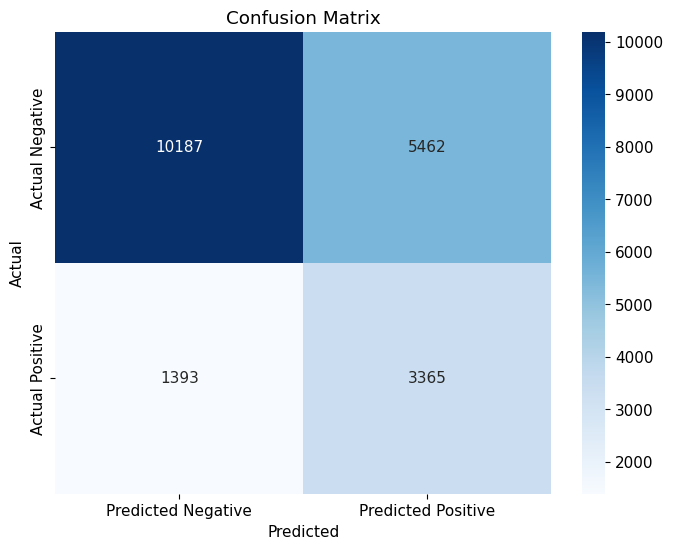

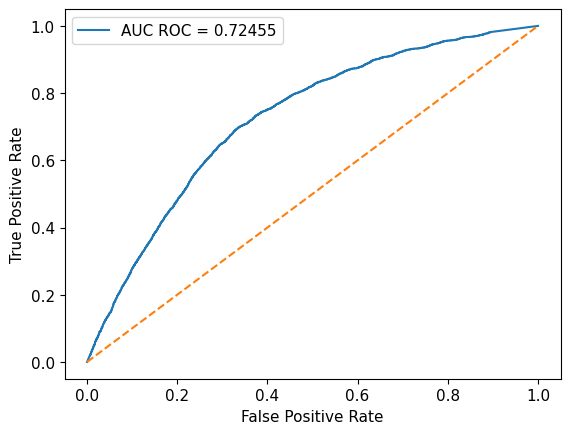

Accuracy: 0.6640858528936149
Precision: 0.38121672142290697
Recall: 0.707229928541404
F1 Score: 0.4953993375046006
AUC-ROC: 0.7245514252865061
pr_auc 0.4100413939216864


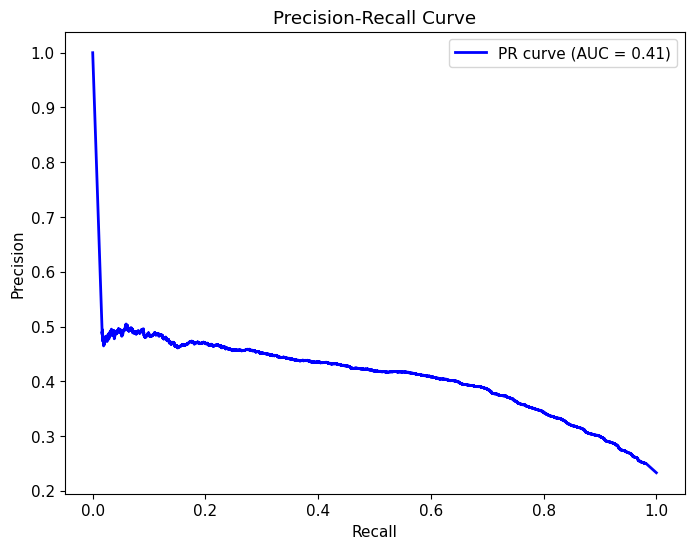

Max F1 Score: 0.49820035992801437
Threshold for Max F1 Score: 0.5094669620123446
ROC-AUC for Max F1 Threshold: 0.6811622056381843


In [19]:
evaluate_classification_model(knn_best, X_test, y_test)

In [20]:
# Predict on the training set 
y_train_pred = knn_best.predict(X_train_sm)
# Predict on the testing set
y_test_pred = knn_best.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  1.00
Testing Accuracy:  0.664086


# Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier()

In [22]:
y_probabilities = clf.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4535,2794,12855,223,7329,13078,0.359141,0.260782,0.953132,0.409518,0.565837,0.259487,0.178542,0.565837,0.156861
1,0.45,4458,3374,12275,300,7832,12575,0.383790,0.266420,0.936948,0.414871,0.576277,0.264322,0.215605,0.576277,0.167888
2,0.50,4347,4713,10936,411,9060,11347,0.443965,0.284434,0.913619,0.433811,0.607394,0.280004,0.301169,0.607394,0.209439
3,0.55,4221,5777,9872,537,9998,10409,0.489930,0.299510,0.887137,0.447828,0.628149,0.292021,0.369161,0.628149,0.234448
4,0.60,4095,6500,9149,663,10595,9812,0.519185,0.309197,0.860656,0.454949,0.638009,0.298601,0.415362,0.638009,0.244532
5,0.65,3949,7272,8377,809,11221,9186,0.549860,0.320380,0.829971,0.462304,0.647332,0.305549,0.464694,0.647332,0.254765
6,0.70,3748,7965,7684,1010,11713,8694,0.573970,0.327852,0.787726,0.463002,0.648352,0.307750,0.508978,0.648352,0.252756


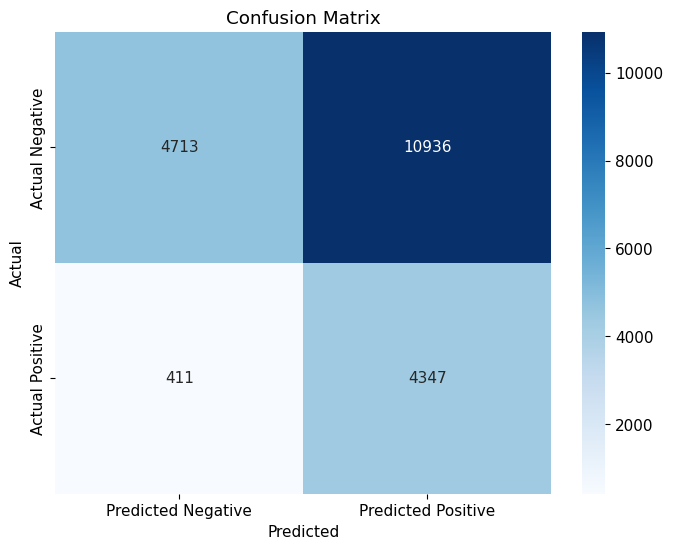

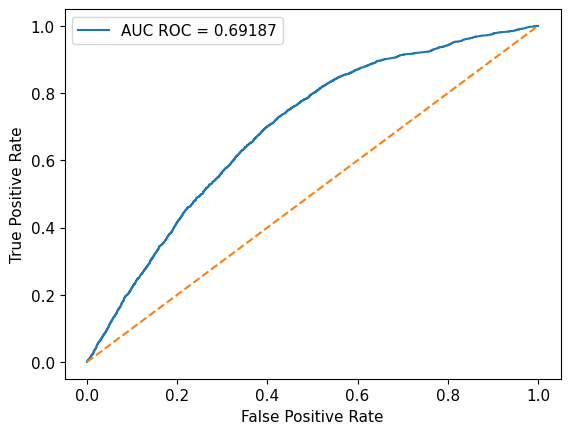

Accuracy: 0.4439653060224433
Precision: 0.28443368448603024
Recall: 0.9136191677175284
F1 Score: 0.43381068808941675
AUC-ROC: 0.6918685517792045
pr_auc 0.3601566926016969


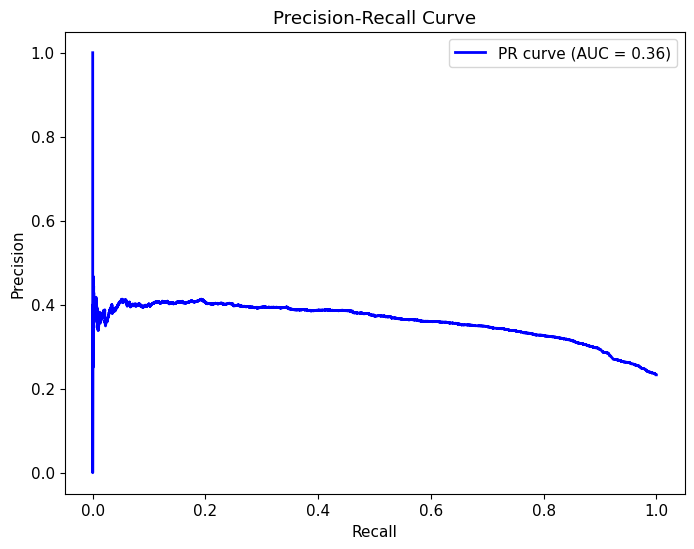

Max F1 Score: 0.4664558239687773
Threshold for Max F1 Score: 0.7560903231852278
ROC-AUC for Max F1 Threshold: 0.6521703890231079


In [23]:
evaluate_classification_model(clf, X_test, y_test)

In [24]:
# Predict on the training set 
y_train_pred = clf.predict(X_train_sm)
# Predict on the testing set
y_test_pred = clf.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.83
Testing Accuracy:  0.443965


## Gradient boosting with hyperparameter tuning

In [25]:
gb_model = GradientBoostingClassifier()

# Define a parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
}

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    random_state=42
)
random_search.fit(X_train_sm, y_train_sm)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')
#Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.1}

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.1}


In [26]:
best_gb_model = GradientBoostingClassifier(**best_params)
best_gb_model.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                           subsample=0.8)

In [27]:
y_probabilities = best_gb_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4476,3327,12322,282,7803,12604,0.382369,0.266460,0.940731,0.415290,0.576666,0.264486,0.212601,0.576666,0.169929
1,0.45,4355,4794,10855,403,9149,11258,0.448327,0.286325,0.915301,0.436198,0.610823,0.281821,0.306345,0.610823,0.215117
2,0.50,4240,5781,9868,518,10021,10386,0.491057,0.300539,0.891131,0.449486,0.630274,0.293203,0.369417,0.630274,0.238492
3,0.55,4096,6592,9057,662,10688,9719,0.523742,0.311412,0.860866,0.457373,0.641053,0.300524,0.421241,0.641053,0.249211
4,0.60,3957,7252,8397,801,11209,9198,0.549272,0.320301,0.831652,0.462482,0.647534,0.305630,0.463416,0.647534,0.255267
5,0.65,3793,7926,7723,965,11719,8688,0.574264,0.329368,0.797184,0.466142,0.651835,0.309854,0.506486,0.651835,0.258959
6,0.70,3560,8591,7058,1198,12151,8256,0.595433,0.335280,0.748214,0.463059,0.648597,0.309566,0.548981,0.648597,0.251539


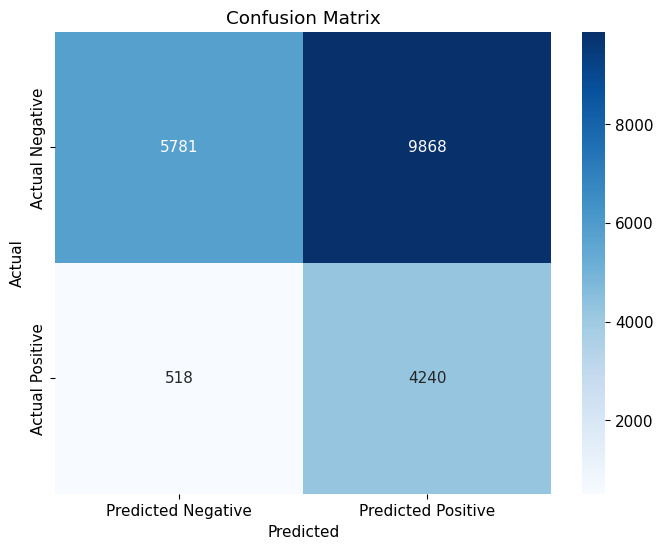

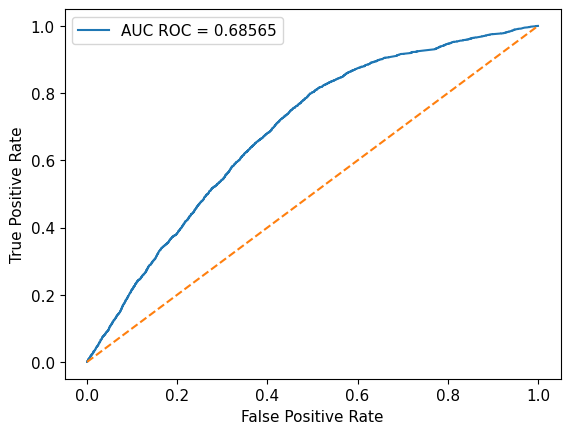

Accuracy: 0.4910569902484442
Precision: 0.3005387014459881
Recall: 0.8911307271963009
F1 Score: 0.44948584755645077
AUC-ROC: 0.6856509880436932
pr_auc 0.3530403899675289


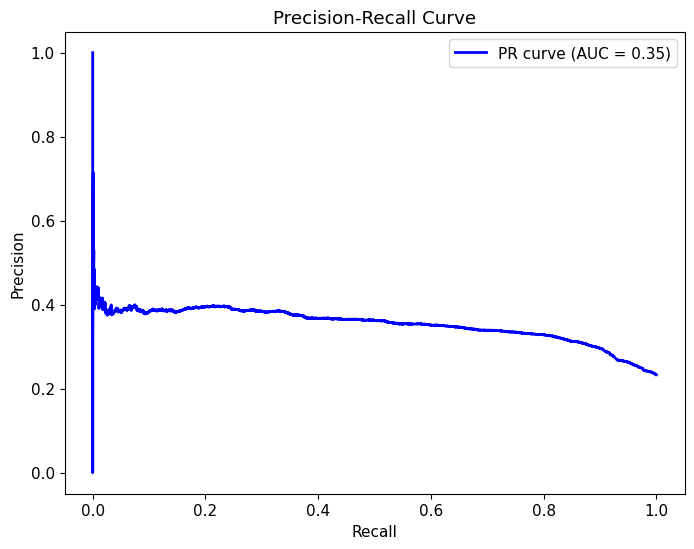

Max F1 Score: 0.466457988093046
Threshold for Max F1 Score: 0.6492334452259634
ROC-AUC for Max F1 Threshold: 0.6521870561504373


In [28]:
evaluate_classification_model(best_gb_model, X_test, y_test)

In [29]:
# Predict on the training set 
y_train_pred = best_gb_model.predict(X_train_sm)
# Predict on the testing set
y_test_pred = best_gb_model.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.83
Testing Accuracy:  0.491057


# MLP

In [30]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=500, random_state=42)
mlp.fit(X_train_sm, y_train_sm)

d:\faacode\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500, random_state=42)

In [31]:
y_probabilities = mlp.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3179,9970,5679,1579,13149,7258,0.644338,0.358885,0.668138,0.466951,0.652620,0.317160,0.637101,0.652620,0.260409
1,0.45,2986,10525,5124,1772,13511,6896,0.662077,0.368187,0.627575,0.464097,0.650071,0.317898,0.672567,0.650071,0.259341
2,0.50,2744,11111,4538,2014,13855,6552,0.678934,0.376820,0.576713,0.455814,0.643363,0.316008,0.710013,0.643363,0.253074
3,0.55,2507,11667,3982,2251,14174,6233,0.694566,0.386346,0.526902,0.445808,0.636222,0.313872,0.745543,0.636222,0.247376
4,0.60,2239,12236,3413,2519,14475,5932,0.709315,0.396143,0.470576,0.430163,0.626239,0.309853,0.781903,0.626239,0.238567
5,0.65,1976,12755,2894,2782,14731,5676,0.721860,0.405749,0.415301,0.410469,0.615184,0.304834,0.815068,0.615184,0.228523
6,0.70,1686,13302,2347,3072,14988,5419,0.734454,0.418051,0.354351,0.383574,0.602186,0.298673,0.850022,0.602186,0.217014


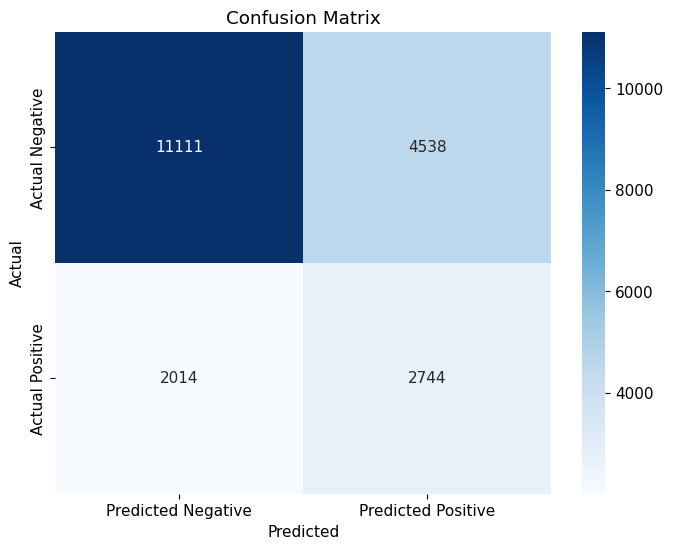

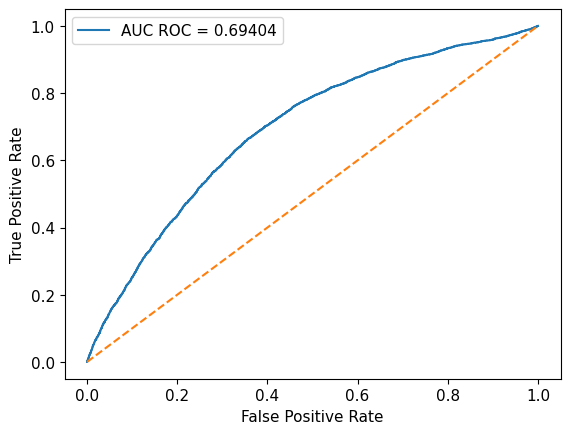

Accuracy: 0.6789336992208556
Precision: 0.3768195550672892
Recall: 0.5767129045817571
F1 Score: 0.4558139534883721
AUC-ROC: 0.6940418659435954
pr_auc 0.38676733541469893


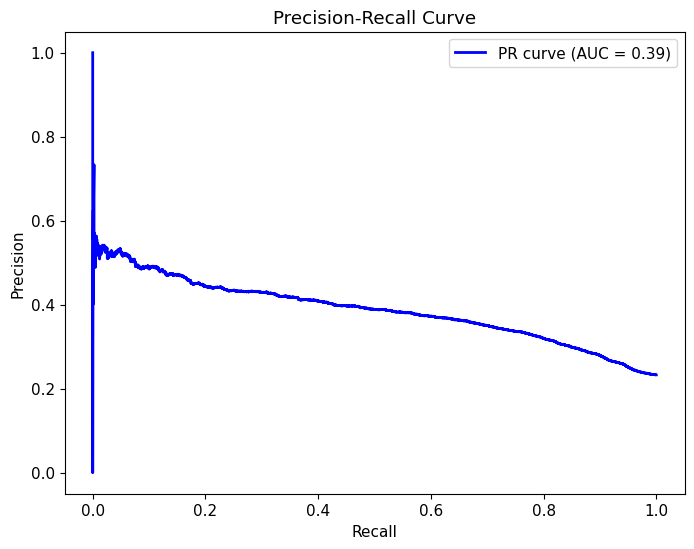

Max F1 Score: 0.46805052818201964
Threshold for Max F1 Score: 0.4047874950124985
ROC-AUC for Max F1 Threshold: 0.653636357556055


In [32]:
evaluate_classification_model(mlp, X_test, y_test)

In [33]:
# Predict on the training set 
y_train_pred = mlp.predict(X_train_sm)
# Predict on the testing set
y_test_pred = mlp.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.79
Testing Accuracy:  0.678934


# MLP with hyperparameter tuning

In [34]:
# Define a dictionary of hyperparameters for grid search
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Create an MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Create a RandomSearchCV object
random_search = RandomizedSearchCV(mlp, param_grid, cv=5, scoring='roc_auc')

random_search.fit(X_train_sm, y_train_sm)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')
# Best Hyperparameters: {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 50), 'alpha': 0.0001, 'activation': 'tanh'}

d:\faacode\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Hyperparameters: {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 50), 'alpha': 0.0001, 'activation': 'tanh'}


In [35]:
best_mlp_model = MLPClassifier(max_iter=500, random_state=42, **best_params)
best_mlp_model.fit(X_train_sm, y_train_sm)

d:\faacode\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50), max_iter=500,
              random_state=42)

In [36]:
y_probabilities = best_mlp_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3650,8057,7592,1108,11707,8700,0.573676,0.324675,0.767129,0.456250,0.640993,0.303363,0.514857,0.640993,0.239715
1,0.45,3509,8581,7068,1249,12090,8317,0.592444,0.331758,0.737495,0.457646,0.642918,0.305874,0.548342,0.642918,0.241888
2,0.50,3372,8992,6657,1386,12364,8043,0.605871,0.336225,0.708701,0.456076,0.641653,0.306201,0.574605,0.641653,0.239622
3,0.55,3213,9390,6259,1545,12603,7804,0.617582,0.339210,0.675284,0.451581,0.637661,0.304773,0.600038,0.637661,0.233435
4,0.60,3072,9733,5916,1686,12805,7602,0.627481,0.341789,0.645649,0.446966,0.633803,0.303295,0.621957,0.633803,0.227932
5,0.65,2892,10072,5577,1866,12964,7443,0.635272,0.341481,0.607818,0.437287,0.625719,0.298997,0.643619,0.625719,0.215777
6,0.70,2719,10367,5282,2039,13086,7321,0.641251,0.339833,0.571459,0.426209,0.616965,0.294117,0.662470,0.616965,0.202606


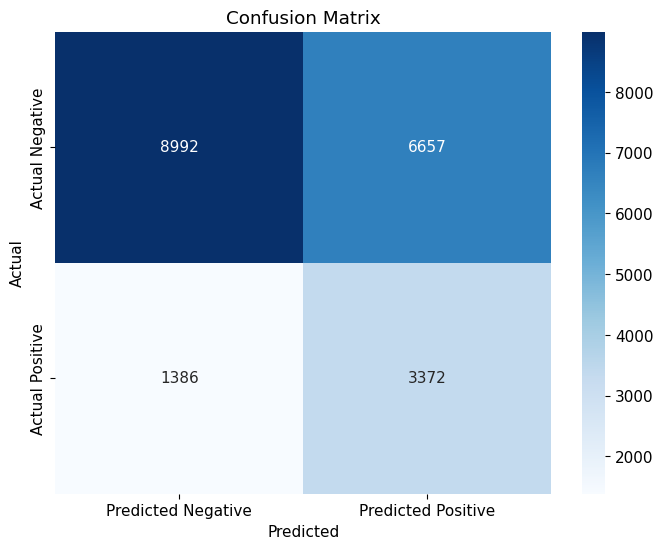

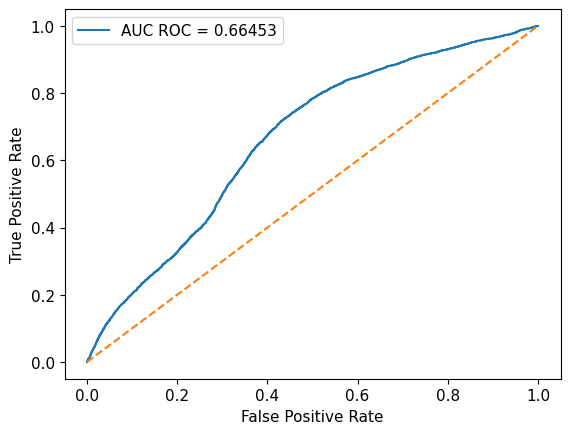

Accuracy: 0.6058705346204734
Precision: 0.33622494765180977
Recall: 0.7087011349306431
F1 Score: 0.45607628322174887
AUC-ROC: 0.6645318910372247
pr_auc 0.3451216362169433


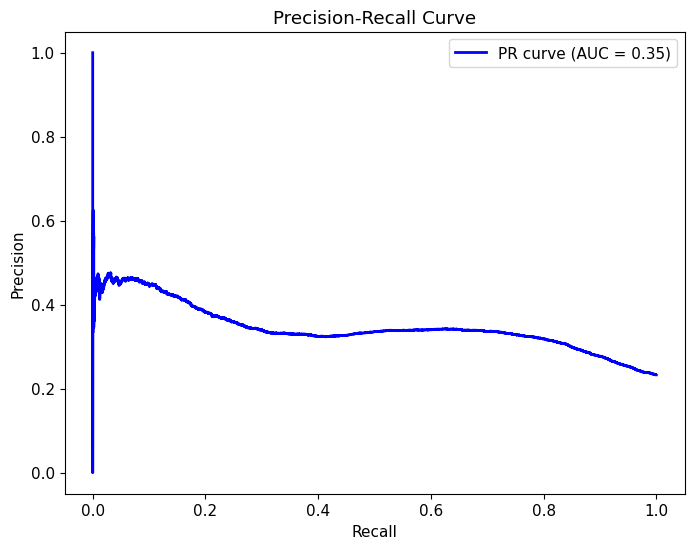

Max F1 Score: 0.4580628408205661
Threshold for Max F1 Score: 0.4447771375850654
ROC-AUC for Max F1 Threshold: 0.6433173374574334


In [37]:
evaluate_classification_model(best_mlp_model, X_test, y_test)

In [38]:
# Predict on the training set 
y_train_pred = best_mlp_model.predict(X_train_sm)
# Predict on the testing set
y_test_pred = best_mlp_model.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.79
Testing Accuracy:  0.605871
